In [20]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
import re
import codecs
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import torch
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from wordcloud import WordCloud
from sklearn import svm


###### Food & Beverages	6270 , Oil & Energy	5646,  Apparel & Fashion	4692,  Sports	3050,  Music	2175 

In [3]:
df = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")
df=df[['company_description','company_industry']]
df.head()

/home/slintel/bert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,company_description,company_industry
0,ProLeads is The Holy Grail of Account Based Pr...,Information Technology and Services
1,cramway | The collaborative e-learning\n\ncram...,E-Learning
2,Imperix is a Swiss company developing high-end...,Electrical/Electronic Manufacturing
3,Yonhap Infomax is a financial news and data pr...,Information Services
4,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages


In [4]:
df=df.loc[(df['company_industry']=='Food & Beverages') |
          (df['company_industry']=='Music') |
          (df['company_industry']=='Sports') |
          (df['company_industry']=='Oil & Energy') |
          (df['company_industry']=='Apparel & Fashion')
         ]

In [5]:
df.reset_index(inplace=True,drop=True)
print(len(df))
df['company_industry'].value_counts()

21833


Food & Beverages     6270
Oil & Energy         5646
Apparel & Fashion    4692
Sports               3050
Music                2175
Name: company_industry, dtype: int64

In [6]:
df

,company_description,company_industry
0,Saffron Fix is the ONLY Indian meal-kit delive...,Food & Beverages
1,Vividly is the best way to create and shop hig...,Apparel & Fashion
2,The strEATS was launched in August of 2010. Th...,Food & Beverages
3,Sublime Exile Recordings is an independent nic...,Music
4,Vil du jobbe med Kremen av iskrem?\nNoen morge...,Food & Beverages
...,...,...
21828,Casual inspired by the original Café Racer style.,Apparel & Fashion
21829,The Isle of Skye Brewery was established in Ap...,Food & Beverages
21830,Paragliding (schermvliegen) school and club,Sports
21831,Dedicated to giving you access to the music yo...,Music


In [7]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", str(elem)))
    return df

data_clean = clean_text(df, 'company_description', 'text_clean')
data_clean['company_description'] = data_clean['text_clean']
df = data_clean[['company_description','company_industry']]

In [8]:
df

,company_description,company_industry
0,saffron fix is the only indian mealkit deliver...,Food & Beverages
1,vividly is the best way to create and shop hig...,Apparel & Fashion
2,the streats was launched in august of the ide...,Food & Beverages
3,sublime exile recordings is an independent nic...,Music
4,vil du jobbe med kremen av iskremnoen morgener...,Food & Beverages
...,...,...
21828,casual inspired by the original caf racer style,Apparel & Fashion
21829,the isle of skye brewery was established in ap...,Food & Beverages
21830,paragliding schermvliegen school and club,Sports
21831,dedicated to giving you access to the music yo...,Music


*****Apparel & Fashion*****


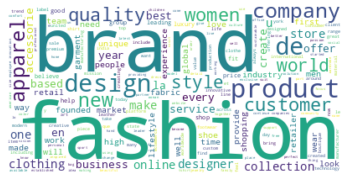

In [9]:
temp = df.loc[df.company_industry=='Apparel & Fashion']
text2 = " ".join(i for i in temp.company_description)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
print('*****Apparel & Fashion*****')
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

*****Music*****


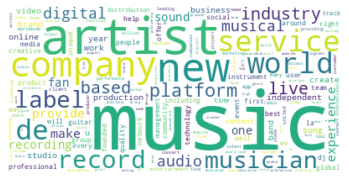

In [10]:
temp = df.loc[df.company_industry=='Music']
text2 = " ".join(i for i in temp.company_description)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
print('*****Music*****')
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

*****Sports*****


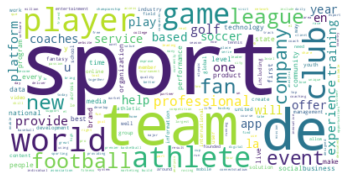

In [11]:
temp = df.loc[df.company_industry=='Sports']
text2 = " ".join(i for i in temp.company_description)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
print('*****Sports*****')
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

*****Oil & Energy*****


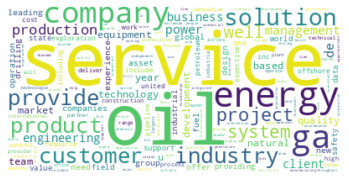

In [12]:
temp = df.loc[df.company_industry=='Oil & Energy']
text2 = " ".join(i for i in temp.company_description)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
print('*****Oil & Energy*****')
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
df['category_id'] = df['company_industry'].factorize()[0]

In [14]:
df

,company_description,company_industry,category_id
0,saffron fix is the only indian mealkit deliver...,Food & Beverages,0
1,vividly is the best way to create and shop hig...,Apparel & Fashion,1
2,the streats was launched in august of the ide...,Food & Beverages,0
3,sublime exile recordings is an independent nic...,Music,2
4,vil du jobbe med kremen av iskremnoen morgener...,Food & Beverages,0
...,...,...,...
21828,casual inspired by the original caf racer style,Apparel & Fashion,1
21829,the isle of skye brewery was established in ap...,Food & Beverages,0
21830,paragliding schermvliegen school and club,Sports,3
21831,dedicated to giving you access to the music yo...,Music,2


In [13]:
X_train, X_val, y_train, y_val = train_test_split(df.company_description, 
                                                  df.category_id, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.category_id)

In [41]:
'''RUN THIS if new data OR for first time'''

from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('stsb-roberta-large') #RoBERTa, an optimized version of BERT by Facebook.

# vectorize the data
X_train_vec = pd.DataFrame(np.vstack(X_train.apply(bert.encode)))
X_test_vec = pd.DataFrame(np.vstack(X_val.apply(bert.encode)))

# X_train_vec.to_csv('../data/TEMP_bert_encoded_train_5_Classes.csv',index=False)
# X_test_vec.to_csv('../data/TEMP_bert_encoded_test_5_Classes.csv',index=False)
# y_train.to_csv('../data/TEMP_for_bert_emb_Y_train_5_Classes.csv',index=False)
# y_val.to_csv('../data/TEMP_for_bert_emb_Y_val_5_Classes.csv',index=False)

In [15]:
'''Run this Cell is Already encoded text is saved'''
X_train_vec=pd.read_csv('../data/TEMP_bert_encoded_train_5_Classes.csv')
X_test_vec=pd.read_csv('../data/TEMP_bert_encoded_test_5_Classes.csv')
y_train=pd.read_csv('../data/TEMP_for_bert_emb_Y_train_5_Classes.csv')
y_val=pd.read_csv('../data/TEMP_for_bert_emb_Y_val_5_Classes.csv')

#dropping index column which got added while saving
X_train_vec=X_train_vec.iloc[:,1:]
X_test_vec=X_test_vec.iloc[:,1:]
y_train=y_train.iloc[:,1:]
y_val=y_val.iloc[:,1:]

#converting to single dimension
y_train=y_train.values.ravel()
y_val=y_val.values.ravel()
y_test=y_val

In [23]:
# BERT doesn't have feature names, 
#use your classifier

model = RandomForestClassifier(n_estimators=800, n_jobs=-1,verbose=1)
model.fit(X_train_vec, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.4min finished


RandomForestClassifier(n_estimators=800, n_jobs=-1, verbose=1)

In [24]:
model.score(X_test_vec, y_val)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    0.3s finished


0.92

In [25]:
y_pred = model.predict(X_test_vec)
print(metrics.classification_report(y_val, y_pred))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       941
           1       0.93      0.88      0.90       704
           2       0.98      0.89      0.93       326
           3       0.96      0.87      0.91       457
           4       0.93      0.95      0.94       847

    accuracy                           0.92      3275
   macro avg       0.93      0.91      0.92      3275
weighted avg       0.92      0.92      0.92      3275



In [26]:
model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
model.score(X_test_vec, y_val)

0.9273282442748092

In [16]:
LR_model = LogisticRegression(n_jobs=-1,verbose=True)
classifier=LR_model.fit(X_train_vec, y_train)
y_pred = LR_model.predict(X_test_vec)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.9s finished


In [17]:
acc_score = LR_model.score(X_test_vec, y_val)
print(acc_score)

0.9303816793893129


/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/slintel/bert/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


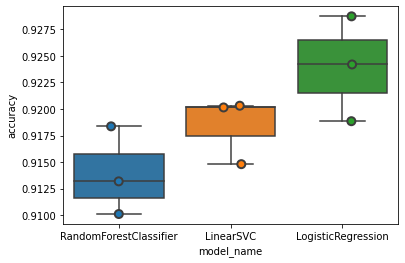

In [32]:
models = [
    RandomForestClassifier(n_estimators=800,random_state=0,n_jobs=-1),
    LinearSVC(),
    LogisticRegression(random_state=0,n_jobs=-1),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_vec, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

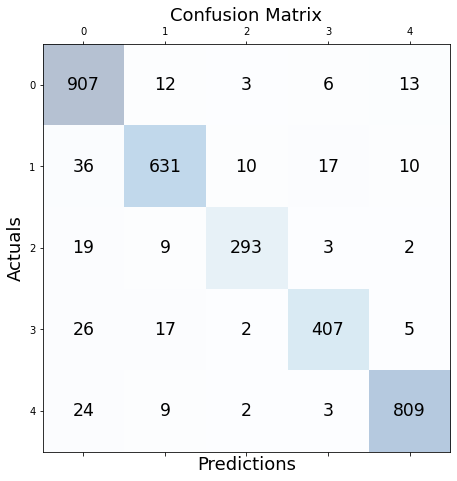

In [34]:
# y_test=y_val
'''VERY SLOW'''
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=df.company_industry.values, yticklabels=df.company_industry.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

'''FAST PLOT'''

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['company_industry'].unique()))

                   precision    recall  f1-score   support

 Food & Beverages       0.90      0.96      0.93       941
Apparel & Fashion       0.93      0.90      0.91       704
            Music       0.95      0.90      0.92       326
           Sports       0.93      0.89      0.91       457
     Oil & Energy       0.96      0.96      0.96       847

         accuracy                           0.93      3275
        macro avg       0.93      0.92      0.93      3275
     weighted avg       0.93      0.93      0.93      3275



In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1,use_label_encoder=False)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
predictions = [round(value) for value in y_pred]

[06:44:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.59%


In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
random_state=42

In [59]:
X=df['company_description']
Y=df['category_id']
     
# Use label_binarize to be multi-label like settings
     
Y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]
    
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15,
                                                    random_state=42,stratify=df.category_id)
X_train=X_train_vec
X_test=X_test_vec
# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state),n_jobs=-1)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [60]:
classifier.score(X_test, Y_test)

0.8702290076335878

In [69]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes=5

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

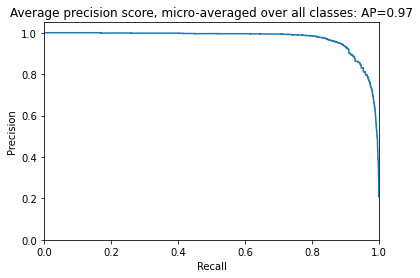

In [70]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

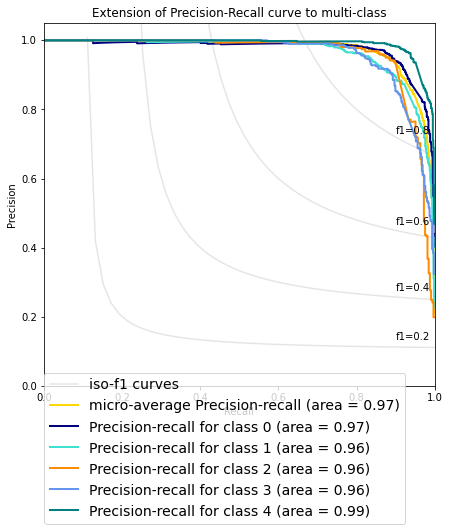

In [71]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [74]:
y_test=y_test.drop(['Unnamed: 0'],axis=1)

In [76]:
y_score

array([[  8.11987747, -10.4129755 ,  -7.44921093, -13.078349  ,
        -11.87801062],
       [  1.91922259,  -6.0456677 ,  -5.81866179,  -4.10957466,
         -8.02369971],
       [  4.73559164,  -2.55443374,  -6.14726621,  -8.66055343,
         -7.86679775],
       ...,
       [ -4.02795588,  -7.703044  ,   3.2775173 ,  -7.33366801,
         -5.45271133],
       [ -9.44214621, -13.15031067,  -7.91971107,  -8.43478005,
         11.22323286],
       [ -3.99028334,   1.7566694 ,  -5.03611948,  -3.15501736,
        -13.92422502]])